In [9]:
%pylab inline
import pandas as pd
from scipy import stats
from scipy.stats import binom
import statsmodels.api as sm
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


#### I claim that I can use mystical abilities to predict the outcome of coin flips.

You don't think I can.

How can we test it?

We do an experiment in which I call 100 coin flips. I get 60 right.

Am I special or not?

*Step 1: Determine the Null Hypothesis & Alternate Hypothesis*  
The hypothesis that I'm not special, the *null hypothesis*, is that my true rate of flip prediction is 0.5. But even under this hypothesis, I could get 60 out of 100 right. So did I get lucky (by random chance) or am I mystical?

The interesting claim, or *alternative hypothesis*, is that my true rate of flip prediction is greater than 0.5.

*Step 2: Determine the Leval of significance (alpha)*  
Before we do the experiment we decide what would convince us that I have ESP. The choice of a cuttoff at 5% probability is common. That is, if we would only see data as extreme as we've seen less than 5% of the time, we'll say that seems too unlikely and we will conclude that we don't think the null hypothesis is true.

*Step 3:  Compute your test statistic*  
The thing we're measuring from the experiment, or *test statistic*, is the number of correct flip predictions out of 100.

If the null hypothesis is correct, the test statistic is binomial distributed with parameters `n = 100` and `p = 0.5`. That is, if we repeated the whole experiment many times, we would see such a distribution for all the results.

So if the null hypothesis is correct, how likely is it that I got 60 or more coin flips correct?

*Step 4: Determine p-value*  

*Step 5: Determine whether to reject the null*
Compare p-value to alpha

In [72]:
from scipy.stats import binom
print 1 - binom.cdf(59, 100, 0.5)

0.0284439668205


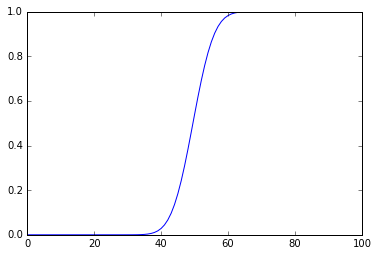

In [73]:
x=range(100)
y=[binom.cdf(d, 100,0.5) for d in x]

plt.plot(x,y)

(0, 100)

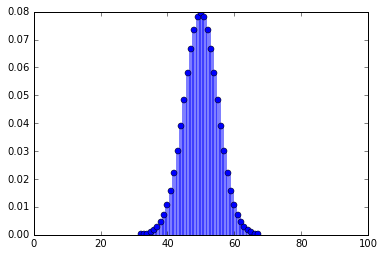

In [74]:
fig, ax = plt.subplots(1, 1)
n,p= 100, 0.5
x=np.arange(binom.ppf(0.0001,n,p),binom.ppf(0.9999,n,p))
ax.plot(x, binom.pmf(x,n,p),'bo', label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
pylab.xlim([0,100])

####  Example 2 
Q:  Is the Average Adult Temperature of Healthy Adults 98.6 F ?

In [31]:
# get data from: https://www.statcrunch.com/app/index.php?dataid=1757870
data=pd.read_csv('bodytemp.csv',header=None)
data.columns=['gender','temp','HR']
data.head()

,gender,temp,HR
0,Male,96.3,70
1,Male,96.7,71
2,Male,96.9,74
3,Male,97.0,80
4,Male,97.1,73


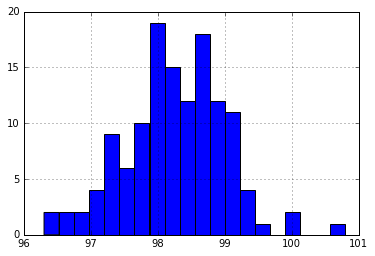

In [32]:
# is data randomly distributed ?  -- > If so, we can use the z-test
data.temp.hist(bins=20)

In [82]:
# format this
N=len(data)
print N
mu=data.temp.mean()
print mu
sd=data.temp.std()
print sd

130
98.2492307692
0.733183158036


Our Z-statistic:
$$z=(x^{bar}-\mu)/(\sigma_{x}/\sqrt(n)) $$


In [17]:
print (98.249-98.6)/(.733/np.sqrt(130))

-5.45977591009


In [23]:
# in lieu of the look-up tables: 

import scipy.stats as st
print st.norm.ppf(.05)
print st.norm.ppf(.975)

-1.64485362695
1.95996398454


#### Example 3

In [28]:
data=pd.read_csv('/Users/julialintern/nyc16_ds8/challenges/challenges_data/2013_movies.csv')
data.head(1)

100


In [13]:
from patsy import dmatrices
y,X=dmatrices('	DomesticTotalGross~Budget+Runtime',data=data, return_type='dataframe')


model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     17.63
Date:                Tue, 12 Jul 2016   Prob (F-statistic):           3.83e-07
Time:                        07:17:35   Log-Likelihood:                -1737.7
No. Observations:                  89   AIC:                             3481.
Df Residuals:                      86   BIC:                             3489.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   5.731e+06   5.13e+07      0.112      0.911     -9.62e+07  1.08e+08
Budget         0.7456      0.142      5.237      0.000         0.463     1.029
Runtime     3.695e+05   4.75e+05      0.778      0.439     -5.74e+05  1.31e+06
==============================================================================
Omnibus:                       40.192   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.831
Skew:                           1.600   Prob(JB):                     7.72e-23
Kurtosis:                       7.149   Cond. No.                     6.21e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.21e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# Find our t-statistic
from scipy.stats import t
# two tail, p<0.05, stats.t.ppf(alpha, N)
print stats.t.ppf(1-0.025, 100)   # our critical value

1.98397151845
